In [1]:
pip install autoviml

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import print_function

In [4]:
import sys,tempfile, urllib, os

In [5]:
import pandas as pd

In [6]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.682. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.46.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [7]:
data = pd.read_csv('Patient.csv')

In [8]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,Abnormal
1,39.06,10.06,25.02,29.00,114.41,4.56,Abnormal
2,68.83,22.22,50.09,46.61,105.99,-3.53,Abnormal
3,69.30,24.65,44.31,44.64,101.87,11.21,Abnormal
4,49.71,9.65,28.32,40.06,108.17,7.92,Abnormal


In [9]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [10]:
# Decide target
target='class'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (217, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (93, 7)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['class']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
    Abnormal:     210  ->   96.8%
      Normal:       7  ->    3.2%
String or Multi Class target: class transformed as follows: {'Abnormal': 0, 'Normal': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of N

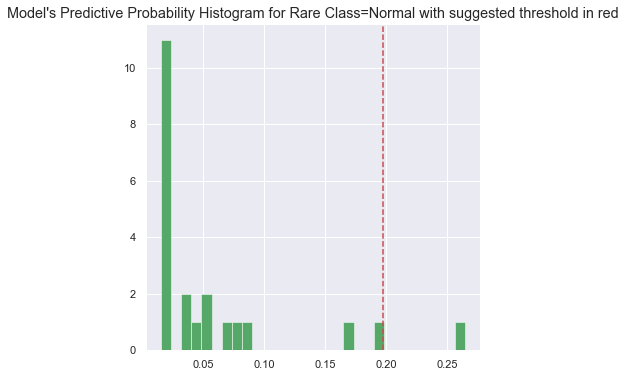

    Using threshold=0.5. However, 0.197 provides better F1=0.67 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 90.9%
Balanced Accuracy = 50.00% with Threshold = 0.50
Confusion Matrix:
[[21  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.00      0.00      0.00         1

    accuracy                           0.95        22
   macro avg       0.48      0.50      0.49        22
weighted avg       0.91      0.95      0.93        22

Balanced Accuracy = 97.62% with Threshold = 0.20
Confusion Matrix:
[[20  1]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.50      1.00      0.67         1

    accuracy                           0.95        22
   macro avg       0.75      0.98      0.82        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 90.9%
    Balanced Accuracy = 47.6%
    Precision         = 0.0%
    Average Precision = 47.6%
    Recall            = 0.0%
    F1 Score          = 0.0%
#####################################################
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.00      0.00      0.00         1

    accuracy                           0.91        22
   macro avg       0.48      0.48      0.48        22
weighted avg       0.91      0.91      0.91        22

[[20  1]
 [ 1  0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 3
    Binning_Flag set to False or there are no flo

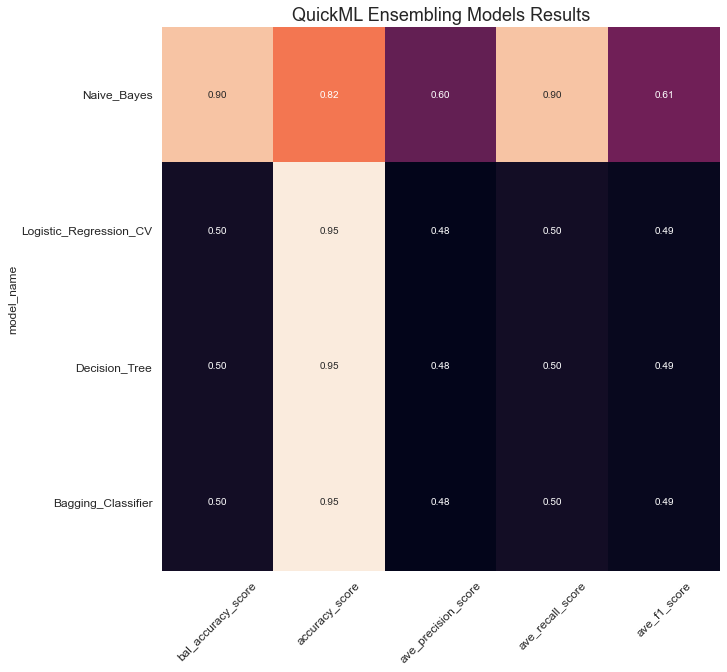

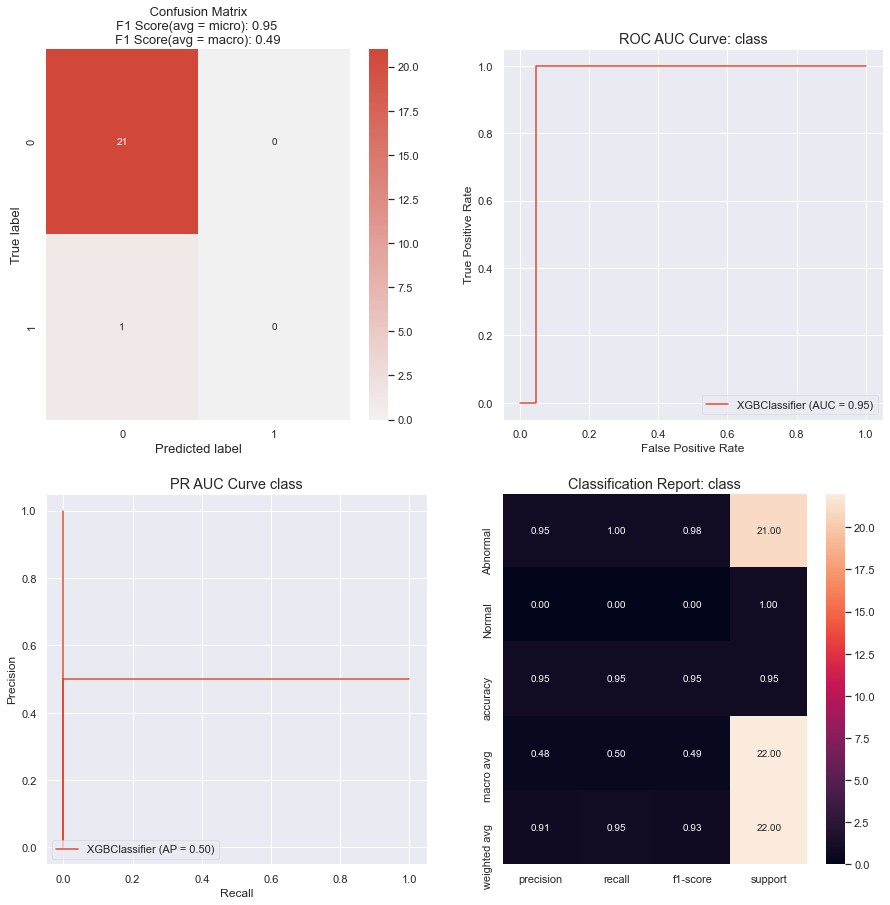

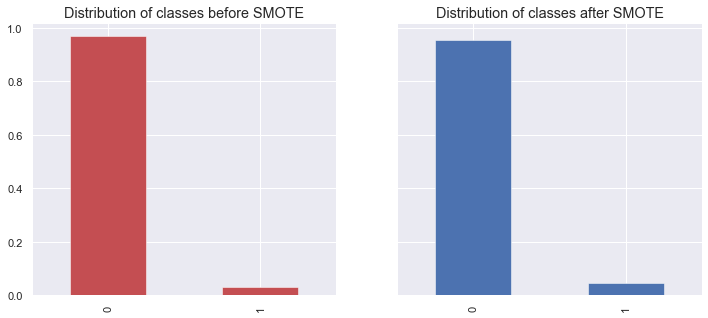

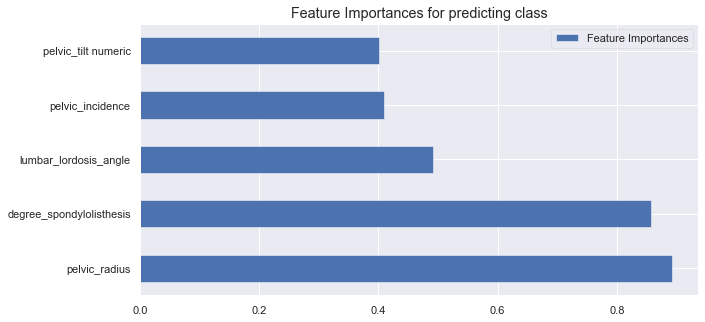

In [11]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [12]:
features

['degree_spondylolisthesis',
 'pelvic_radius',
 'lumbar_lordosis_angle',
 'pelvic_tilt numeric',
 'pelvic_incidence']

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
testm

,degree_spondylolisthesis,pelvic_radius,lumbar_lordosis_angle,pelvic_tilt numeric,pelvic_incidence,class_proba_Abnormal,class_proba_Normal,class_predictions,class_Logistic_Regression_CV_predictions,class_Decision_Tree_predictions,class_Naive_Bayes_predictions,class_Bagging_Classifier_predictions,class_XGBoost_predictions,class_Ensembled_predictions
217,0.04,0.67,0.33,0.23,0.12,0.84,0.16,Abnormal,Abnormal,Abnormal,Normal,Abnormal,Abnormal,Abnormal
218,0.03,0.64,0.19,0.40,0.25,0.70,0.30,Normal,Abnormal,Normal,Normal,Abnormal,Normal,Normal
219,0.03,0.39,0.33,0.59,0.37,0.97,0.03,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
220,0.02,0.47,0.16,0.51,0.18,0.96,0.04,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
221,0.02,0.61,0.35,0.22,0.28,0.63,0.37,Normal,Abnormal,Normal,Normal,Normal,Normal,Normal
222,0.10,0.50,0.44,0.35,0.29,0.99,0.01,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
223,0.02,0.36,0.55,0.45,0.42,0.95,0.05,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
224,0.03,0.33,0.69,0.52,0.61,0.97,0.03,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
225,0.03,0.59,0.37,0.26,0.32,0.96,0.04,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
226,0.04,0.78,0.44,0.40,0.36,0.93,0.07,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal


In [16]:
print(classification_report(test_df[target].values,testm['class_predictions'].values))

              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00         0
      Normal       1.00      0.28      0.44        93

    accuracy                           0.28        93
   macro avg       0.50      0.14      0.22        93
weighted avg       1.00      0.28      0.44        93

